In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 400
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "LeafImages",
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 1622 files belonging to 26 classes.


In [4]:
class_names = dataset.class_names
class_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Basella Alba (Basale)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek) (2)']

(32, 400, 400, 3)
[ 2 12 24  4  6  3 18  2 18 24  3 19 22 10  1 17 19 12 21  9  1  0 18 16
 18 24  3  3 12 23  9 20]


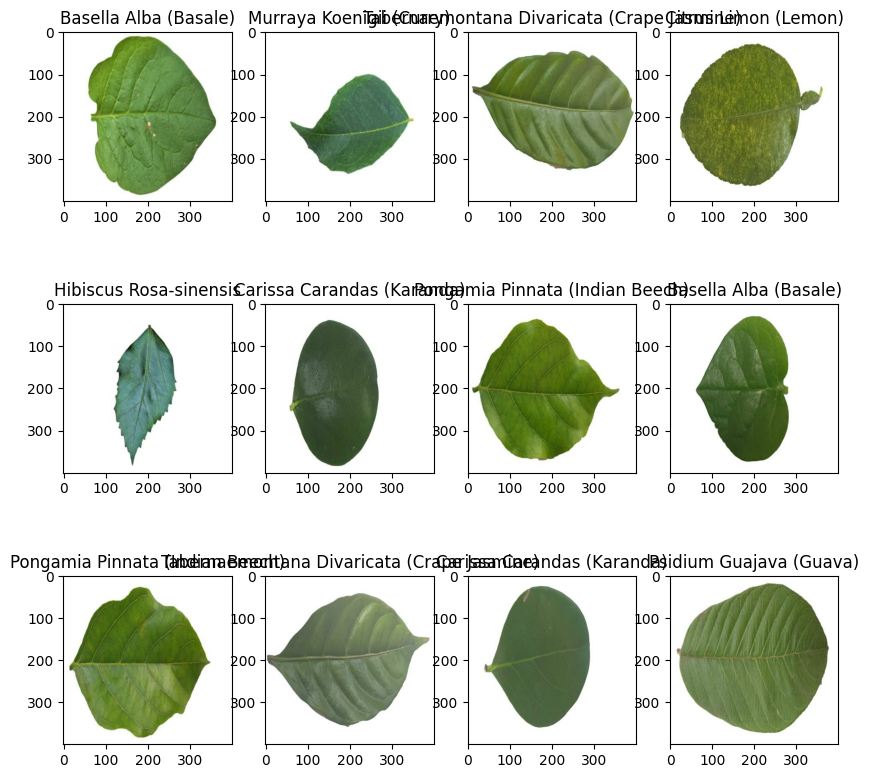

In [5]:
plt.figure(figsize=(10,10))
for image_batch, image_labels in dataset.take(1):
    print(image_batch.shape)
    print(image_labels.numpy())
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch [i] . numpy() . astype("uint8"))
        plt.title(class_names[image_labels[i]])
        

In [6]:
train_size = 0.8
len(dataset) * train_size

40.800000000000004

In [7]:
train_ds = dataset.take(54)
len(train_ds)

51

In [8]:
test_ds = dataset.skip(54)
len(test_ds)

0

In [9]:
val_size = 0.1
len(dataset)* val_size

5.1000000000000005

In [10]:
val_ds = test_ds.take(6)
len(val_ds)

0

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [12]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000 ):
    assert (train_split + val_split + test_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        train_size = int (train_split*ds_size)
        val_size = int(val_split*ds_size)
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size). take(val_size)
        test_ds = ds.skip(train_size). skip(val_size)  
    return train_ds, val_ds, test_ds


In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

40

In [15]:
len(val_ds)

5

In [16]:
len(test_ds)

6

In [17]:
train_ds.cache(). shuffle(1000). prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds.cache(). shuffle(1000). prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds.cache(). shuffle(1000). prefetch(buffer_size= tf.data.AUTOTUNE)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
for image_batch, image_labels in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classess=26
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classess, activation='softmax'), 
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 400, 400, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 400, 400, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 398, 398, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 199, 199, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 197, 197, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 98, 98, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10
40/40 [==============================] - 530s 13s/step - loss: 7.2580 - accuracy: 0.0661 - val_loss: 3.3149 - val_accuracy: 0.0875
Epoch 2/10
40/40 [==============================] - 587s 14s/step - loss: 3.0402 - accuracy: 0.1378 - val_loss: 2.9345 - val_accuracy: 0.1375
Epoch 3/10
40/40 [==============================] - 546s 13s/step - loss: 2.6193 - accuracy: 0.2172 - val_loss: 2.1719 - val_accuracy: 0.3063
Epoch 4/10
40/40 [==============================] - 511s 13s/step - loss: 2.1811 - accuracy: 0.3398 - val_loss: 1.9573 - val_accuracy: 0.3625
Epoch 5/10
40/40 [==============================] - 482s 12s/step - loss: 1.8573 - accuracy: 0.4118 - val_loss: 1.5932 - val_accuracy: 0.4750
Epoch 6/10
40/40 [==============================] - 483s 12s/step - loss: 1.6211 - accuracy: 0.4913 - val_loss: 1.2837 - val_accuracy: 0.5750
Epoch 7/10
40/40 [==============================] - 459s 11s/step - loss: 1.5567 - accuracy: 0.5181 - val_loss: 1.3793 - val_accuracy: 0.5312
Epoch 

In [25]:
scores =model.evaluate(test_ds)

6/6 [==============================] - 22s 3s/step - loss: 1.3536 - accuracy: 0.6042


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
acc = history.history['accuracy']
loss = history.history['loss']


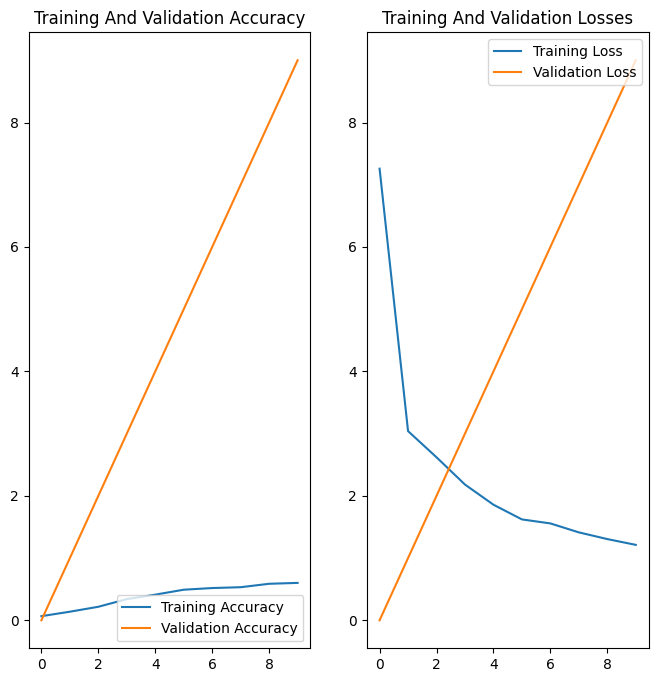

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS), label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Losses')
plt.show()

First Image to Predict
Actual Label: Plectranthus Amboinicus (Mexican Mint)
1/1 [==============================] - 3s 3s/step
Predict Label: Plectranthus Amboinicus (Mexican Mint)


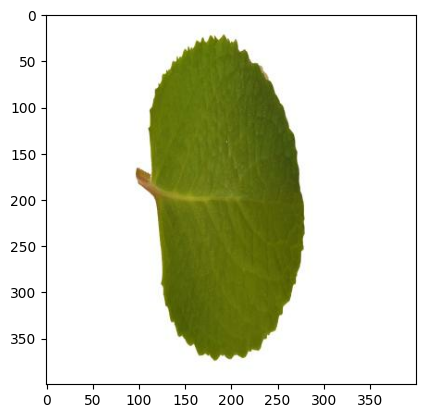

In [29]:
import numpy as np
for image_batch, image_labels in test_ds.take(1):
    first_image = image_batch[0]. numpy().astype("uint8")
    print('First Image to Predict')
    plt.imshow(first_image)
    print('Actual Label:',class_names[image_labels[0]. numpy()])
    
    batch_prediction = model.predict(image_batch)
    print('Predict Label:', class_names[np.argmax(batch_prediction[0])])
    

In [30]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 150ms/step


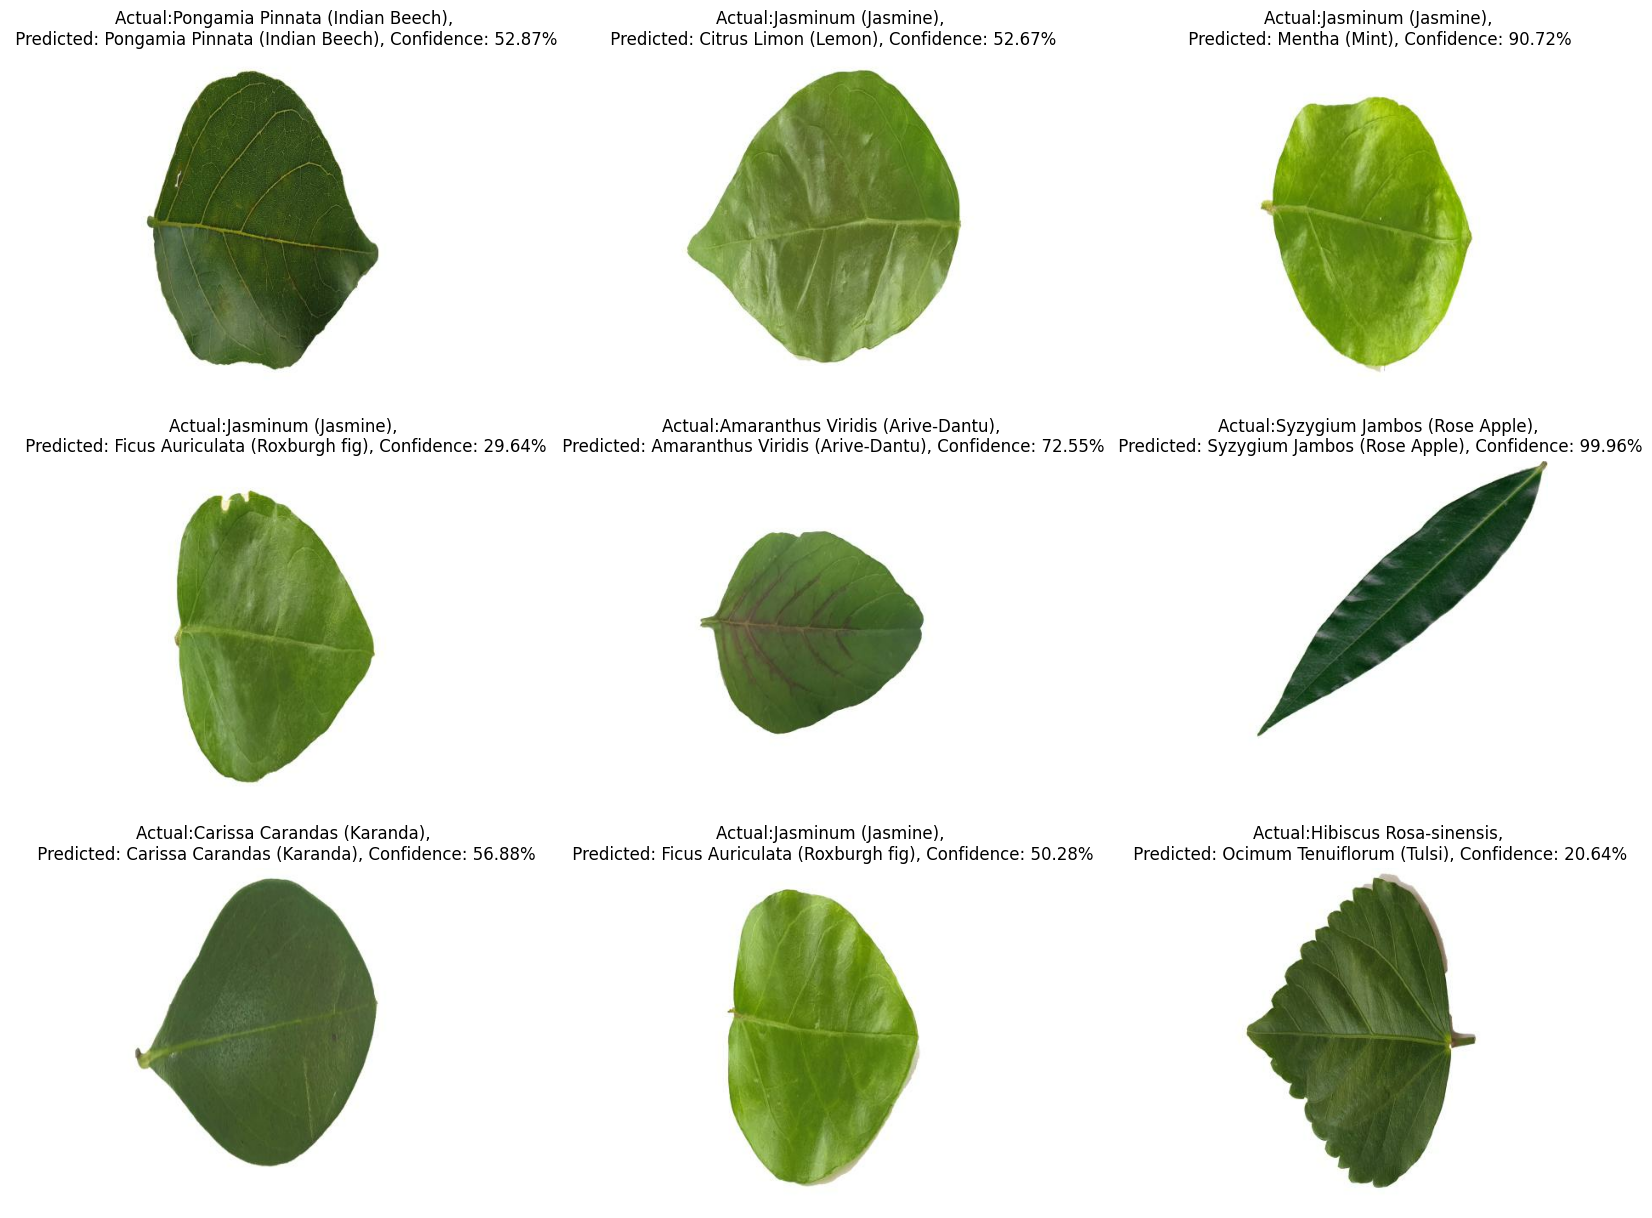

In [31]:
plt.figure(figsize=(20, 15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}, Confidence: {confidence}%")
        plt.axis('off')

In [58]:
model_version=30
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
